In [23]:
"""
!!! Do not execute this cell with jupyter notebook
"""
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install yfinance

# Stock Market Analysis Project

### Please Note: You are free to treat this as a full exercise, or just view the solutions video as a code along project. This project is meant to be pretty challenging as it will introduce a few new concepts through some hints!

Welcome to your first capstone project! This project is meant to cap off the first half of the course, which mainly dealt with learning the libraries that we use in this course, the second half of the course will deal a lot more with quantitative trading techniques and platforms.

We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. Keep in mind that this project is mainly just to practice your skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis we do here!

### Part 0: Import

** Import the various libraries you will need-you can always just come back up here or import as you go along :) **

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import os
#I'll import other needed libraries as I go:)

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)

**  *Note! Not everyone will be working on a computer that will give them open access to download the stock information using pandas_datareader (firewalls, admin permissions, etc...). Because of this, the csv file for the Tesla is provided in a data folder inside this folder. It is called Tesla_Stock.csv. Feel free to just use this with read_csv! **

** Use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.**



In [25]:
import datetime

start_date = datetime.datetime(2012,1,1)
end_date = datetime.datetime.now()

# Check if yfinance data is available
try:
    tesla = yf.Ticker("TSLA")
    tesla_data = tesla.history(start=start_date, end=end_date)
except Exception as e:
    print("Failed to fetch Tesla data from yfinance:", e)
    # If yfinance data is not available, read from CSV
    tesla_data = pd.read_csv('../Data/Tesla_Stock.csv')
    tesla_data.set_index('Date', inplace=True)
    print(tesla_data)

In [26]:
tesla = tesla.history(start=start_date, end=end_date)
tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,1.929333,1.966667,1.843333,1.872000,13921500,0.0,0.0
2012-01-04 00:00:00-05:00,1.880667,1.911333,1.833333,1.847333,9451500,0.0,0.0
2012-01-05 00:00:00-05:00,1.850667,1.862000,1.790000,1.808000,15082500,0.0,0.0
2012-01-06 00:00:00-05:00,1.813333,1.852667,1.760667,1.794000,14794500,0.0,0.0
2012-01-09 00:00:00-05:00,1.800000,1.832667,1.741333,1.816667,13455000,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-01 00:00:00-04:00,182.000000,185.860001,179.009995,179.990005,92829700,0.0,0.0
2024-05-02 00:00:00-04:00,182.860001,184.600006,176.020004,180.009995,89148000,0.0,0.0
2024-05-03 00:00:00-04:00,182.100006,184.779999,178.419998,181.190002,75491500,0.0,0.0


## For other two companies

In [27]:
#For Ford stock
try:
    ford = yf.Ticker("F")
    ford_data = ford.history(start=start_date, end=end_date)
except Exception as e:
    print("Failed to fetch Ford data from yfinance:", e)
    # If yfinance data is not available, read from CSV
    ford_data = pd.read_csv('../Data/Ford_Stock.csv')
    ford_data.set_index('Date', inplace=True)
    print(ford_data)

In [28]:
ford = ford.history(start=start_date, end=end_date)
ford

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,6.255454,6.397624,6.249767,6.329382,45709900,0.00,0.0
2012-01-04 00:00:00-05:00,6.340755,6.556853,6.295261,6.426057,79725200,0.00,0.0
2012-01-05 00:00:00-05:00,6.443116,6.613719,6.391935,6.590972,67877500,0.00,0.0
2012-01-06 00:00:00-05:00,6.676276,6.710397,6.551167,6.659215,59840700,0.00,0.0
2012-01-09 00:00:00-05:00,6.727456,6.795697,6.653528,6.710396,53981500,0.00,0.0
...,...,...,...,...,...,...,...
2024-05-01 00:00:00-04:00,12.014079,12.280840,12.004199,12.053599,48749400,0.00,0.0
2024-05-02 00:00:00-04:00,12.251199,12.399400,12.211679,12.340119,46868600,0.00,0.0
2024-05-03 00:00:00-04:00,12.488320,12.606880,12.241320,12.280840,47463300,0.00,0.0


In [29]:
try:
    gm = yf.Ticker("GM")
    gm_data = gm.history(start=start_date, end=end_date)
except Exception as e:
    print("Failed to fetch GM data from yfinance:", e)
    # If yfinance data is not available, read from CSV
    gm_data = pd.read_csv('../Data/GM_Stock.csv')
    gm_data.set_index('Date', inplace=True)
    print(gm_data)

In [30]:
gm = gm.history(start=start_date, end=end_date)
gm

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,15.810299,16.075954,15.749577,15.977282,9321300,0.0,0.0
2012-01-04 00:00:00-05:00,15.977283,16.220169,15.749578,16.053185,7856700,0.0,0.0
2012-01-05 00:00:00-05:00,16.015240,16.918469,15.908977,16.827387,17880600,0.0,0.0
2012-01-06 00:00:00-05:00,16.895691,17.480133,16.880510,17.396641,18234500,0.0,0.0
2012-01-09 00:00:00-05:00,17.609168,17.783742,17.229660,17.335922,12084500,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-01 00:00:00-04:00,44.500000,45.200001,44.380001,44.470001,13986800,0.0,0.0
2024-05-02 00:00:00-04:00,44.900002,45.150002,44.570000,44.669998,13214900,0.0,0.0
2024-05-03 00:00:00-04:00,45.029999,45.549999,44.509998,44.860001,10046000,0.0,0.0


## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

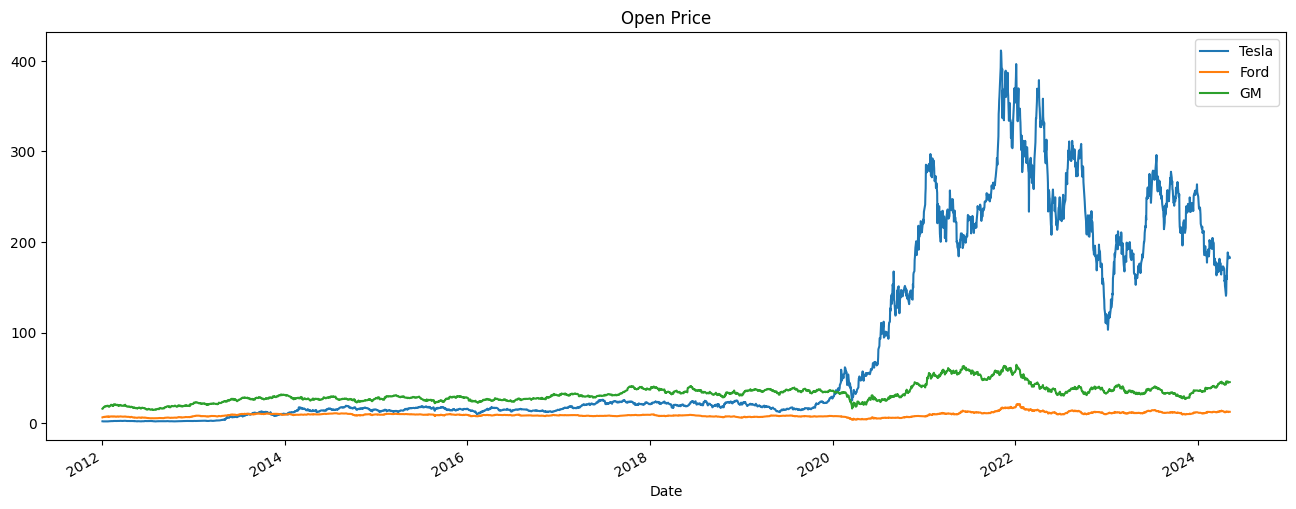

In [31]:


plt.figure(figsize=(16,6))
tesla['Open'].plot(label='Tesla')
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='GM')

plt.title('Open Price')
plt.legend()

____

** Plot the Volume of stock traded each day.**

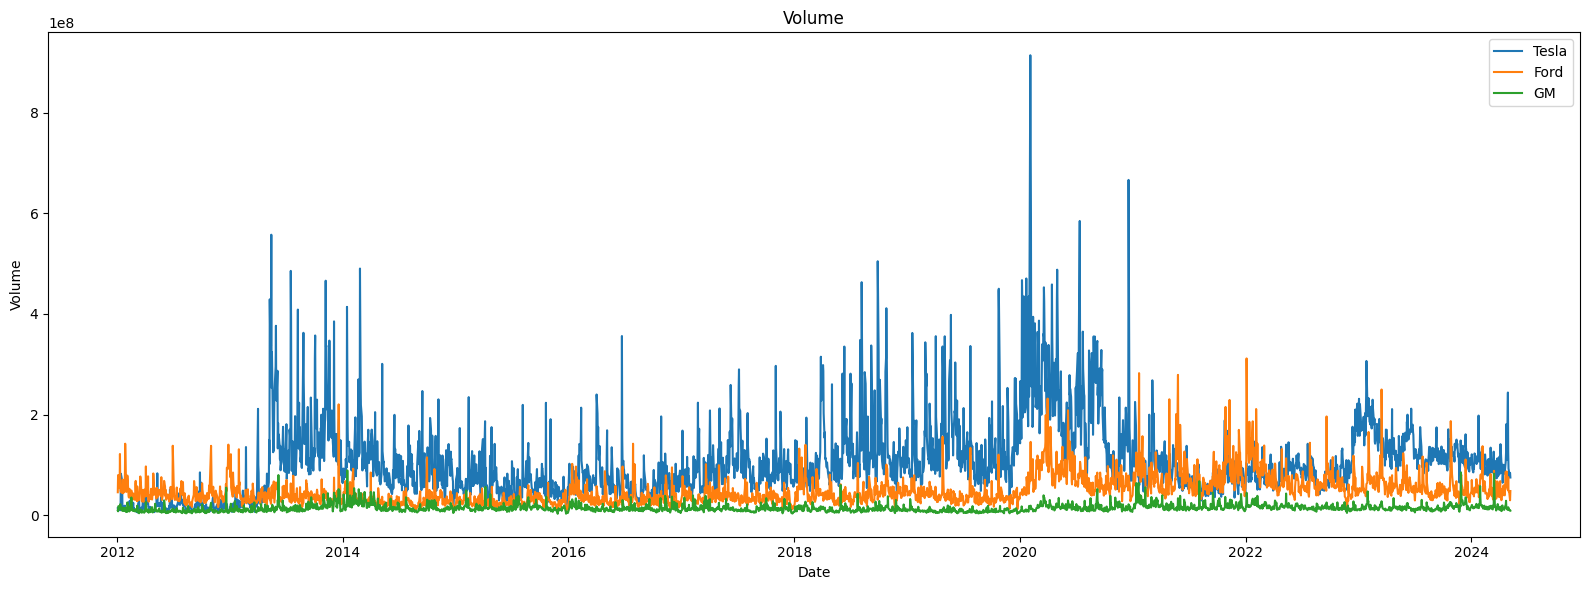

In [32]:
import matplotlib.dates as mdates

plt.figure(figsize=(16,6))
sns.lineplot(data=tesla['Volume'], label='Tesla')
sns.lineplot(data=ford['Volume'], label='Ford')
sns.lineplot(data=gm['Volume'], label='GM');

'''date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#plt.xticks(rotation=45);'''                            
##Question was asking to plot each day, but the 2012 to 2024 is too much data to handel and will take longer to exicute the code so just did it by year!
##if you'd like the commented code will show you each day data.

plt.title('Volume')
plt.tight_layout()

plt.legend();

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**Bonus: What happened that day? **

In [35]:
ford['Volume'].argmax()

2518

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [55]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']


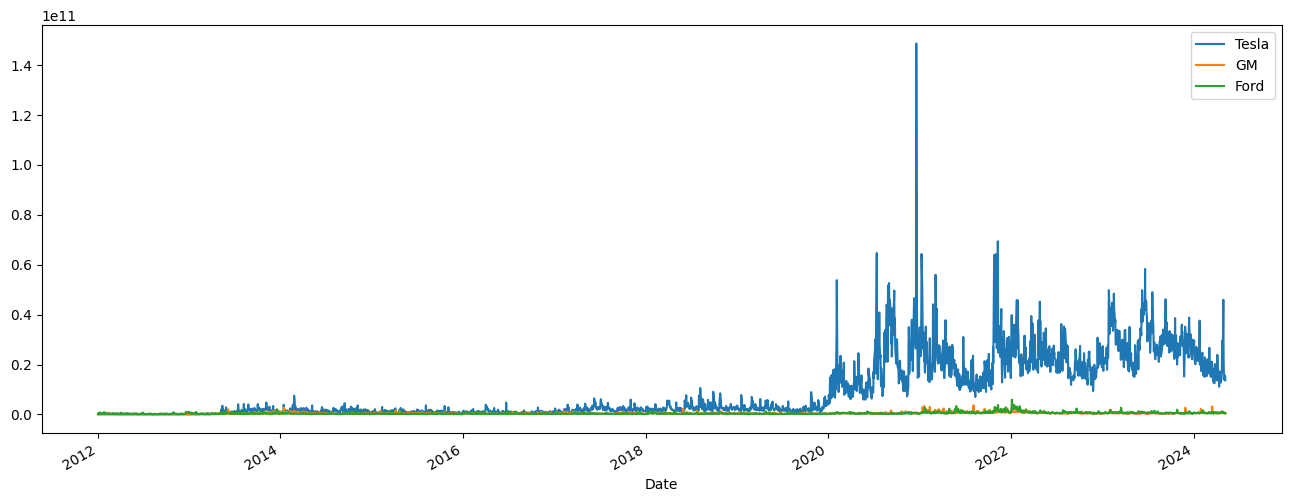

In [57]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,6))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()


** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [64]:
tesla_sorted = tesla.sort_values(by='Total Traded', ascending=False)

timestamp = tesla_sorted.index[0]
timestamp

Timestamp('2020-12-18 00:00:00-0500', tz='America/New_York')

___

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

<Axes: xlabel='Date'>

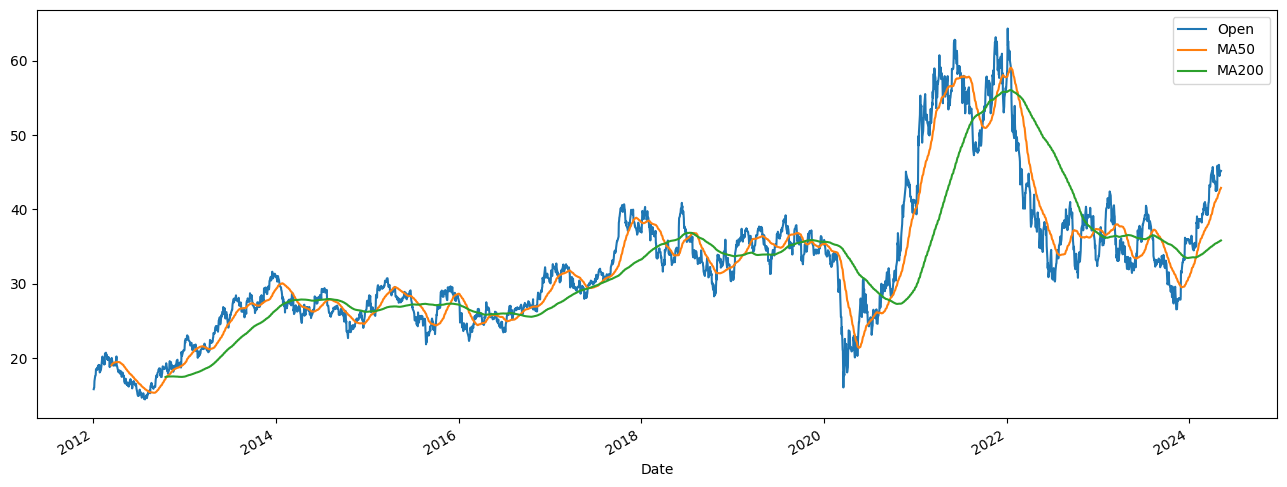

In [69]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='GM',figsize=(16,6))


** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [71]:
from pandas.plotting import scatter_matrix

car_comp = pd.concat([tesla["Open"],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']
car_comp.tail()

,Tesla Open,GM Open,Ford Open
Date,,,
2024-05-01 00:00:00-04:00,182.000000,44.500000,12.014079
2024-05-02 00:00:00-04:00,182.860001,44.900002,12.251199
2024-05-03 00:00:00-04:00,182.100006,45.029999,12.488320
2024-05-06 00:00:00-04:00,183.800003,45.099998,12.389519
2024-05-07 00:00:00-04:00,182.399994,45.189999,12.400000


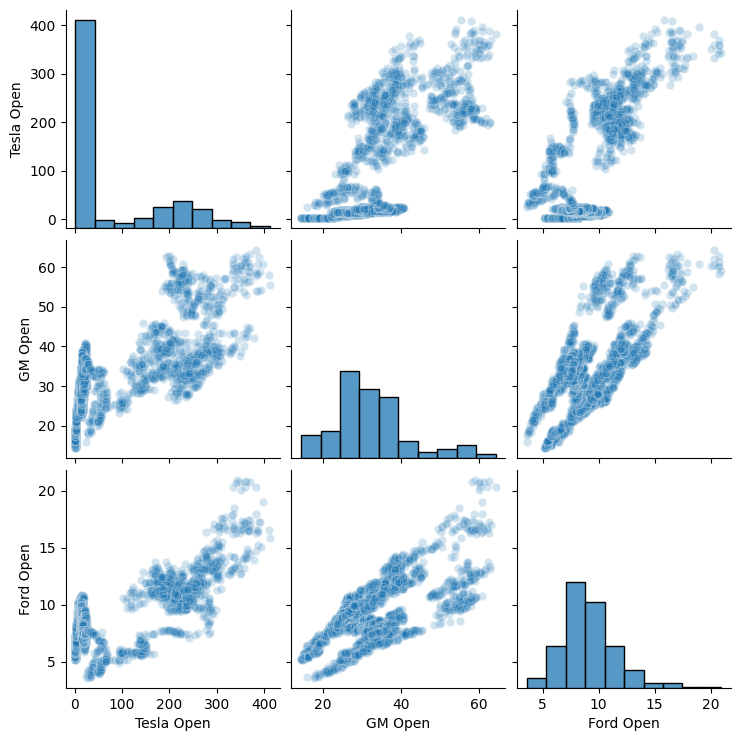

In [75]:
sns.pairplot(car_comp, diag_kind='hist', diag_kws={'bins': 10}, plot_kws={'alpha': 0.2})

_____
### Bonus Visualization Task! (Note: This is hard!)
**Let's now create a candlestick chart! Watch the video if you get stuck on trying to recreate this visualization, there are quite a few steps involved!Refer to the video to understand how to interpret and read this chart. Hints: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

** Create a CandleStick chart for Ford in January 2012 (too many dates won't look good for a candlestick chart)**

** The matplotlib.finance module has been deprecated and removed. So had to use mplfinance

In [102]:

from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY, date2num
import mplfinance as mpf  ##had to insall mplfinance. pip install mplfinance

In [ ]:
#As of now I am getting errors with my code.Error says that " Expect data as DataFrame" even though ford_data is DataFrame as you can see from the below cell. 
##I will get back to this. I will do it in a different way.

In [118]:
print(type(ford_data))

if not isinstance(ford_data, pd.DataFrame):
    pass

print(type(ford_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


[*********************100%%**********************]  1 of 1 completed

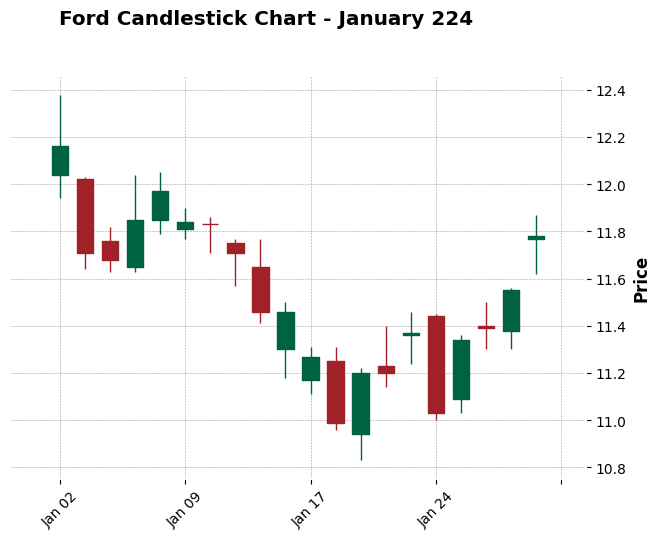

In [145]:
ford = yf.download("F", start="2024-01-01", end="2024-01-31")

sns.set_style(style="whitegrid")  # Setting Seaborn style
mpf.plot(ford, type='candle', style='charles', title='Ford Candlestick Chart - January 224', ylabel='Price')